In [ ]:
!nvidia -smi

/bin/bash: line 1: nvidia: command not found


In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
!pip install transformers==4.19.2
!pip install rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=8304ef01cbb332b16c4ff27f8aa82f11e223c3d7abd34a024a7233e5db35c062
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
from datasets import load_metric
import pandas as pd
df = pd.read_csv("/content/preprocessing_data.csv")
df.head()

,title,summary,content
0,Advancements in AI,A brief overview of recent advancements in AI.,Artificial Intelligence (AI) has seen tremendo...
1,Impact of Climate Change,The global effects of climate change are worse...,"Climate change is affecting ecosystems, leadin..."
2,Future of Electric Vehicles,An insight into the increasing demand for elec...,The electric vehicle industry is growing rapid...
3,Generated Title 4,Generated summary for entry 4.,This is the generated content for the entry nu...
4,Generated Title 5,Generated summary for entry 5.,This is the generated content for the entry nu...


In [ ]:
print(df.shape)
df=df.dropna()
print(df.shape)

(50, 3)
(50, 3)


In [ ]:
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(50, 3)
(50, 3)


In [ ]:
df['length']=df.title.map(lambda x: len(x.split(" ")))


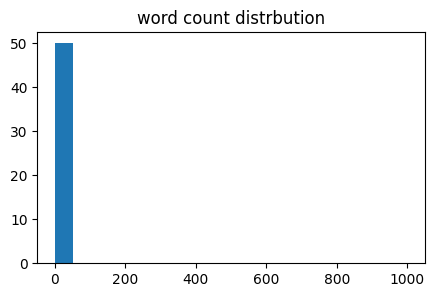

In [ ]:
n=df.length
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(5,3))
plt.hist(n.to_numpy(),bins=[0,50,100,200,300,500,1000])
plt.title("word count distrbution")
plt.show()

In [ ]:
tempdf=df[df.length<=200]
tempdf.shape

(50, 4)

In [ ]:
from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained("allenai/led-base-16384")

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

new one

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [3]:
# Load your dataset
data = pd.read_csv('student_data.csv')

# Preprocess data
# Normalize performance scores for compatibility with ML algorithms
data['performance_score'] = (data['performance_score'] - data['performance_score'].mean()) / data['performance_score'].std()

# Pivot to create a student-content matrix, aggregating duplicate entries by taking the mean
student_content_matrix = data.pivot_table(
    index='student_id',
    columns='content_id',
    values='performance_score',
    aggfunc='mean'  # Use 'mean' to average duplicate entries, you can use other functions like 'sum', 'min', 'max' etc.
).fillna(0)

In [4]:
# Compute similarity using cosine similarity
content_similarity = cosine_similarity(student_content_matrix.T)
content_similarity_df = pd.DataFrame(content_similarity, index=student_content_matrix.columns, columns=student_content_matrix.columns)


In [5]:
# Define a Sequential model
model = Sequential([
    Dense(128, input_dim=student_content_matrix.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(student_content_matrix.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
X = student_content_matrix.values
y = student_content_matrix.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.0460 - loss: -0.2526 - val_accuracy: 0.1100 - val_loss: 0.1992
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0779 - loss: -1.6105 - val_accuracy: 0.1900 - val_loss: -0.5278
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1234 - loss: -2.1455 - val_accuracy: 0.2500 - val_loss: -1.4627
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1416 - loss: -3.5199 - val_accuracy: 0.2400 - val_loss: -2.6973
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2034 - loss: -4.8999 - val_accuracy: 0.2500 - val_loss: -4.3701
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2054 - loss: -6.3141 - val_accuracy: 0.2400 - val_loss: -6.4793
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2259 - loss: -9.9148 - val_accuracy: 0.2700 - val_loss: -9.0918
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2711 - loss: -13.5268 - val_accuracy: 0.3100 - val_

In [10]:
def recommend_content(student_id, model, top_n=5):
    student_index = list(student_content_matrix.index).index(student_id)
    student_data = student_content_matrix.iloc[student_index].values.reshape(1, -1)

    # Predict probabilities for each content item
    prediction = model.predict(student_data)
    recommended_indices = prediction.argsort()[0][-top_n:][::-1]  # Top N content recommendations

    return student_content_matrix.columns[recommended_indices]

# Example usage
student_id = 168  # Replace with actual student_id
recommendations = recommend_content(student_id, model)
print("Recommended content:", recommendations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Recommended content: Index([19, 6, 11, 7, 14], dtype='int64', name='content_id')


In [12]:
import pandas as pd
import numpy as np
# Assuming your content IDs range from 1 to 20
content_ids = student_content_matrix.columns

# Sample data for learning patterns associated with each content_id
content_learning_patterns = pd.DataFrame({
    'content_id': content_ids,  # Assuming `content_ids` is defined as in the previous code (1 to 20)
    'learning_pattern': np.random.choice(['visual', 'auditory', 'kinesthetic', 'reading/writing'], len(content_ids))
})

# Modify the recommend_content function
def recommend_content_with_pattern(student_id, model, top_n=5):
    student_index = list(student_content_matrix.index).index(student_id)
    student_data = student_content_matrix.iloc[student_index].values.reshape(1, -1)

    # Predict probabilities for each content item
    prediction = model.predict(student_data)
    recommended_indices = prediction.argsort()[0][-top_n:][::-1]  # Top N content recommendations
    recommended_content = student_content_matrix.columns[recommended_indices]

    # Get learning patterns for recommended content
    recommendations_with_patterns = content_learning_patterns[content_learning_patterns['content_id'].isin(recommended_content)]

    # Display content_id and learning_pattern
    recommendations = pd.merge(
        pd.DataFrame({'content_id': recommended_content}),
        recommendations_with_patterns,
        on='content_id'
    )

    return recommendations

# Example usage
student_id = 168  # Replace with actual student_id
recommendations = recommend_content_with_pattern(student_id, model)
print("Recommended content with learning patterns:")
print(recommendations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Recommended content with learning patterns:
   content_id learning_pattern
0          19           visual
1           6           visual
2          11         auditory
3           7         auditory
4          14           visual
